In [24]:
library(dplyr)

In [25]:
#Read datasets
#Download the data from http://www.saedsayad.com/datasets/CreditData.zip
train <- read.csv("bike_rental_train.csv")
test <- read.csv("bike_rental_test.csv")

In [26]:
#Show  
head(train)
head(test)

,temp,humidity,windspeed,bike_rent_count
,<dbl>,<int>,<dbl>,<int>
1,9.02,80,0.0000,40
2,9.02,80,0.0000,32
3,9.84,75,0.0000,13
4,9.84,75,0.0000,1
5,9.84,75,6.0032,1
6,9.02,80,0.0000,2


,temp,humidity,windspeed,bike_rent_count
,<dbl>,<int>,<dbl>,<int>
1,9.84,81,0.0000,16
2,17.22,88,16.9979,37
3,16.40,87,16.9979,36
4,18.86,94,12.9980,6
5,18.86,94,12.9980,3
6,14.76,71,16.9979,70


In [27]:
#-------
# ZeroR
#-------

#train
train.frq <- table(train$bike_rent_count)
max.frq <- which.max(train.frq)
model.zeror <- names(max.frq)

#test
test.count <- length(test$bike_rent_count)
test.error <- length(which(test$bike_rent_count != model.zeror))
test.accuracy <- 1-(test.error/test.count)

In [28]:
sqrt(sum(((test$bike_rent_count-max.frq)^2)/test.count))

[1] 262.1889

In [29]:
sqrt(sum(((test$bike_rent_count!=max.frq)^2)/test.count))

[1] 0.9884121


Call:
lm(formula = bike_rent_count ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.62 -102.84  -32.72   67.26  707.22 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 176.50655    8.33024  21.189   <2e-16 ***
temp          8.73939    0.20541  42.547   <2e-16 ***
humidity     -2.68049    0.08747 -30.646   <2e-16 ***
windspeed     0.30852    0.20603   1.497    0.134    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 158 on 9797 degrees of freedom
Multiple R-squared:  0.2386,	Adjusted R-squared:  0.2383 
F-statistic:  1023 on 3 and 9797 DF,  p-value: < 2.2e-16


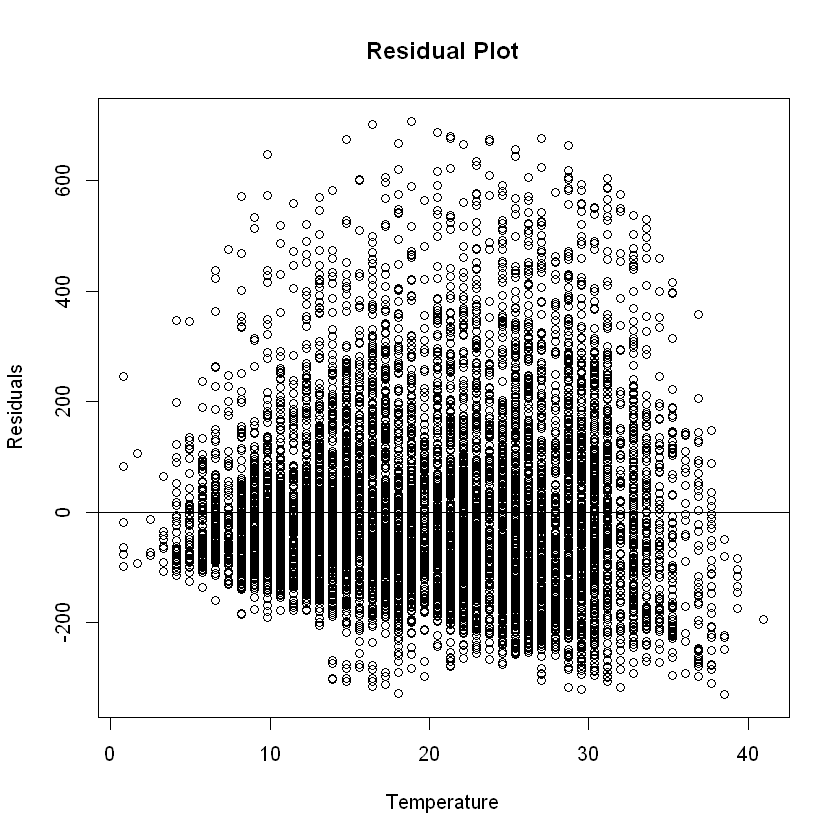

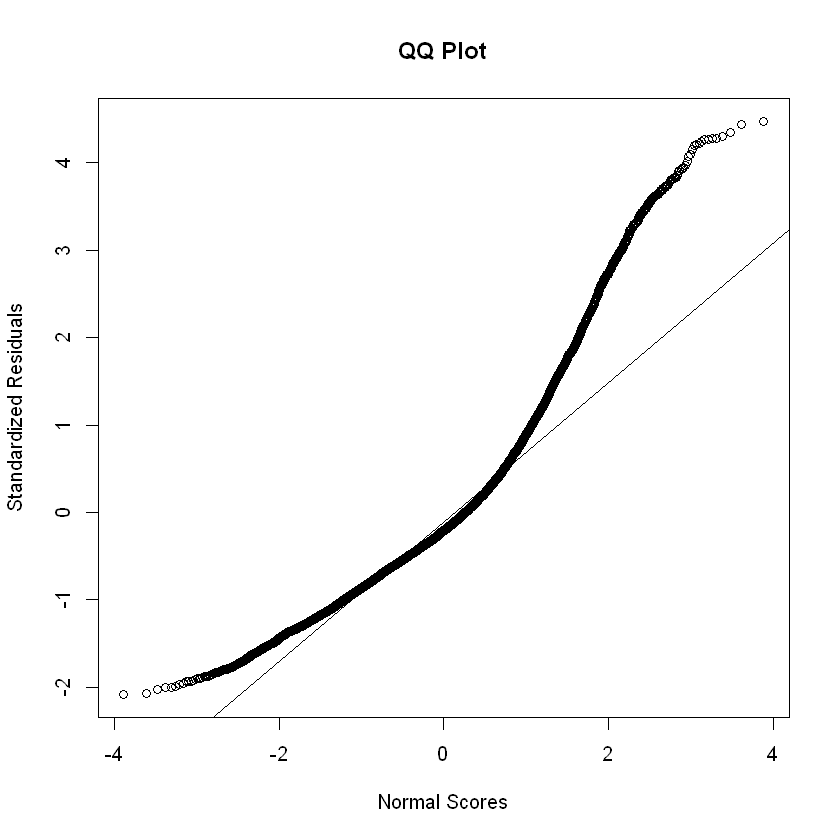

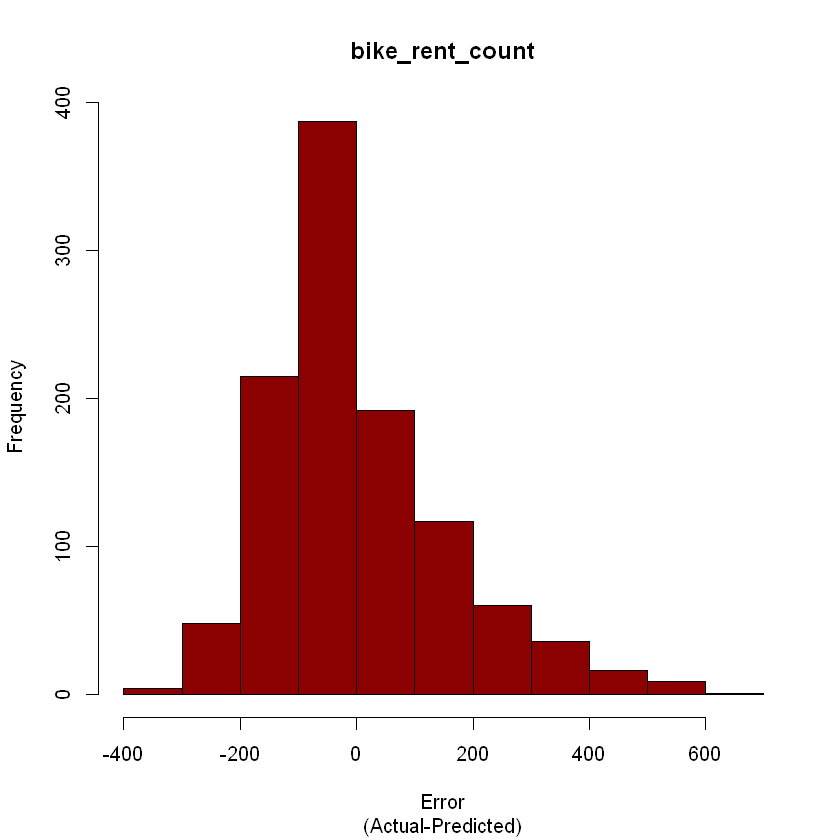

In [35]:
#----------------------------
# Multiple Linear Regression
#----------------------------

#Train
model.MLR <- lm(bike_rent_count ~., data=train)
summary(model.MLR)

#Residual plot
res.MLR = resid(model.MLR)
plot(train$temp, res.MLR, ylab="Residuals", xlab="Temperature", main="Residual Plot") 
abline(0, 0)

#Q-Q plot
stdres.MLR = rstandard(model.MLR)
qqnorm(stdres.MLR, ylab="Standardized Residuals", xlab="Normal Scores", main="QQ Plot") 
qqline(stdres.MLR)

#Test
predictions <- predict(model.MLR, newdata=test)
errors <- test$bike_rent_count - predictions 
rmse <- sqrt(mean((errors^2)))

#Erros histogram
hist(errors, main="bike_rent_count", sub="(Actual-Predicted)", xlab="Error", breaks=10, col="darkred")

Warning message:
"package 'kknn' was built under R version 4.0.4"

Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy





Call:
kknn(formula = bike_rent_count ~ ., train = train, test = test,     k = 5, distance = 2, scale = FALSE)

Response: "continuous"


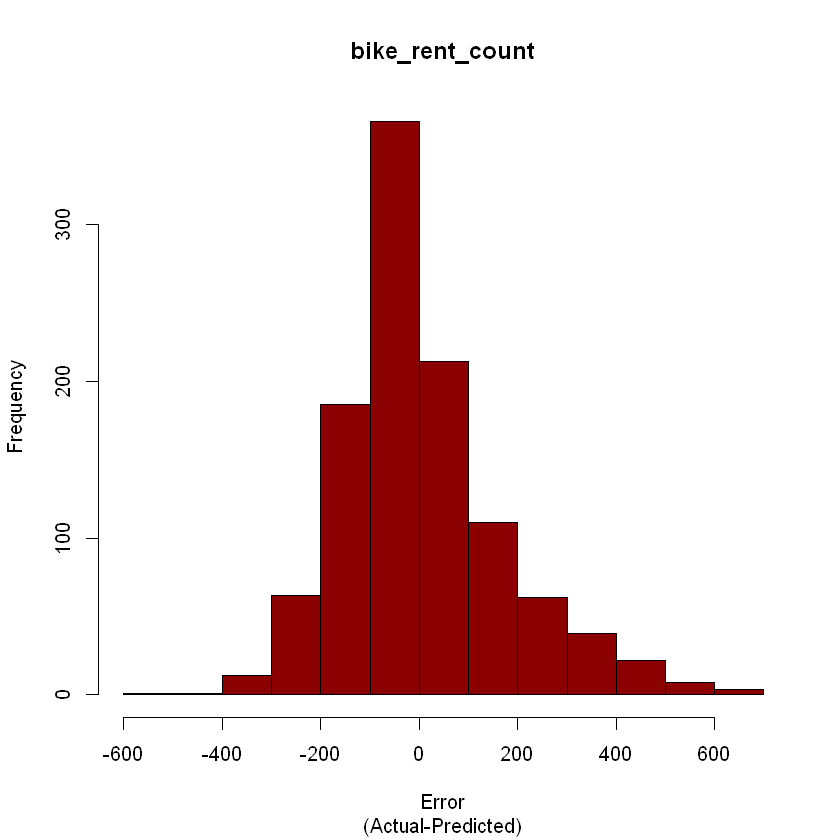

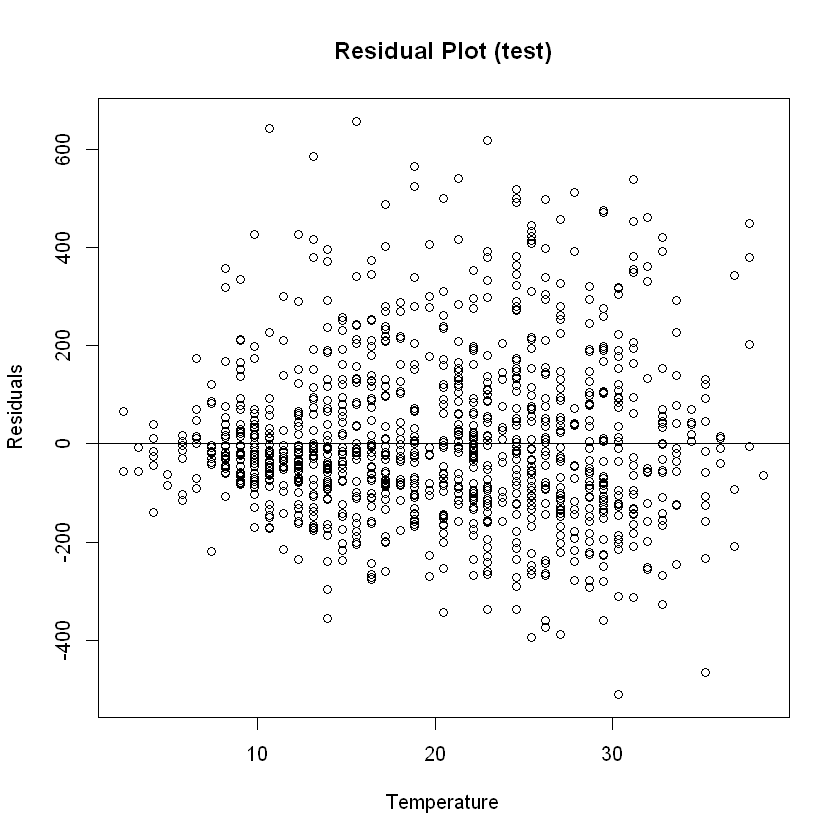

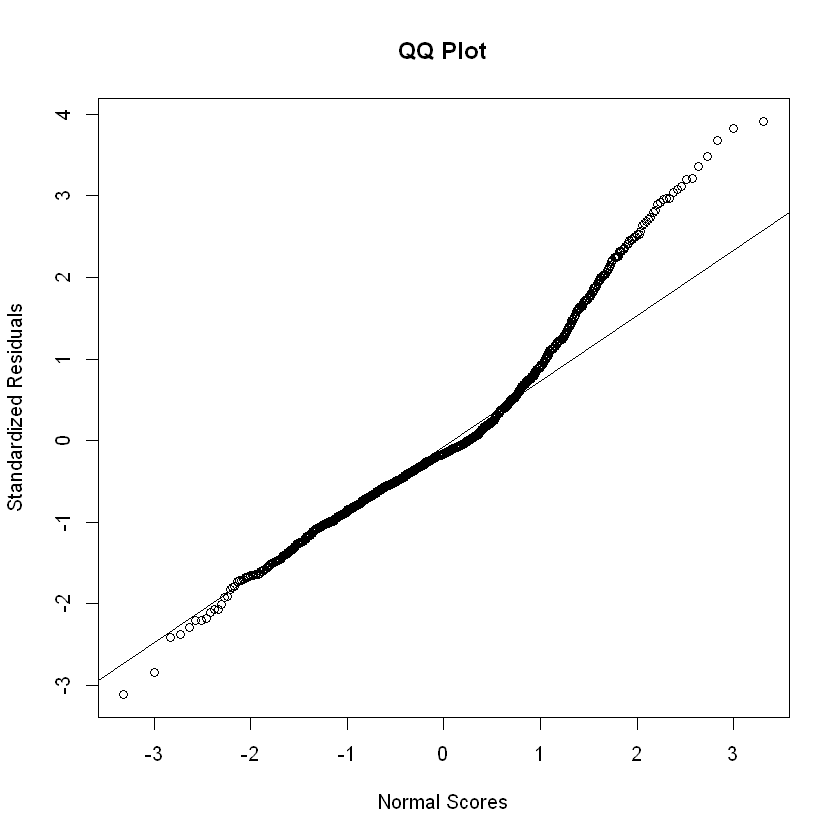

In [36]:
#----------------------------------
# K Nearest Neighbors - Regression
#----------------------------------
library(kknn)

#Train
model.KNN <- kknn(bike_rent_count~., train, test, k=5, distance = 2, scale=FALSE)
summary(model.KNN)

#Test
pred.KNN <- predict(model.KNN, newdata=test)
err.KNN <- test$bike_rent_count - pred.KNN 
rmse.KNN <- sqrt(mean((err.KNN^2)))

#Errors histogram
hist(err.KNN, main="bike_rent_count", sub="(Actual-Predicted)", xlab="Error", breaks=10, col="darkred")

#Residual plot
plot(test$temp, err.KNN, ylab="Residuals", xlab="Temperature", main="Residual Plot (test)") 
abline(0, 0)

#Q-Q plot
stdres.KNN = scale(err.KNN)
qqnorm(stdres.KNN, ylab="Standardized Residuals", xlab="Normal Scores", main="QQ Plot") 
qqline(stdres.KNN)



Call:
kknn(formula = bike_rent_count ~ ., train = train, test = test,     k = 3, distance = 2, scale = FALSE)

Response: "continuous"


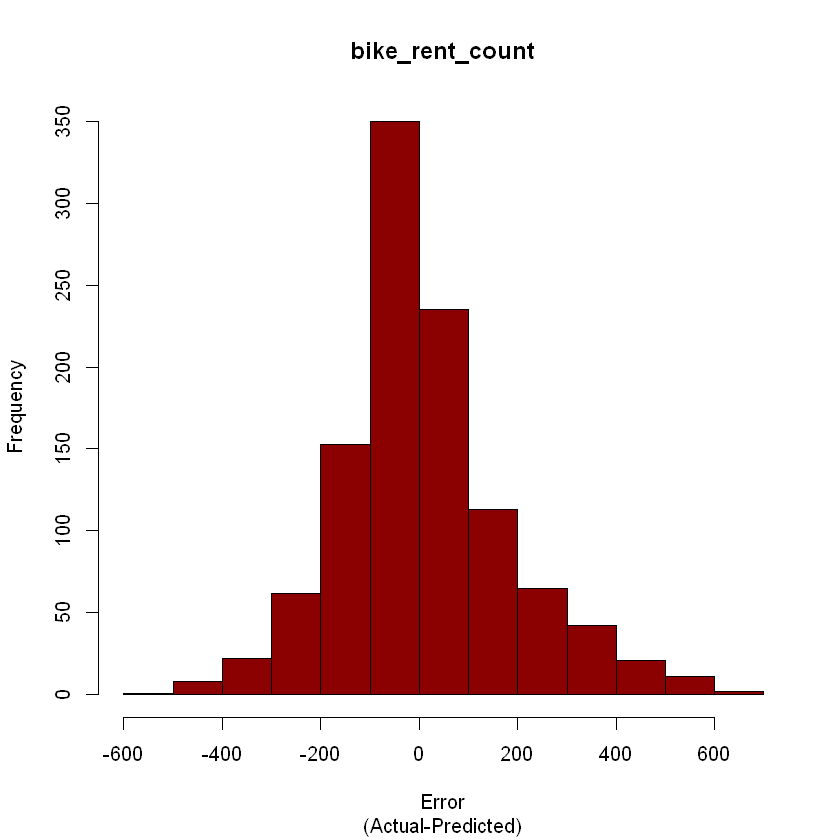

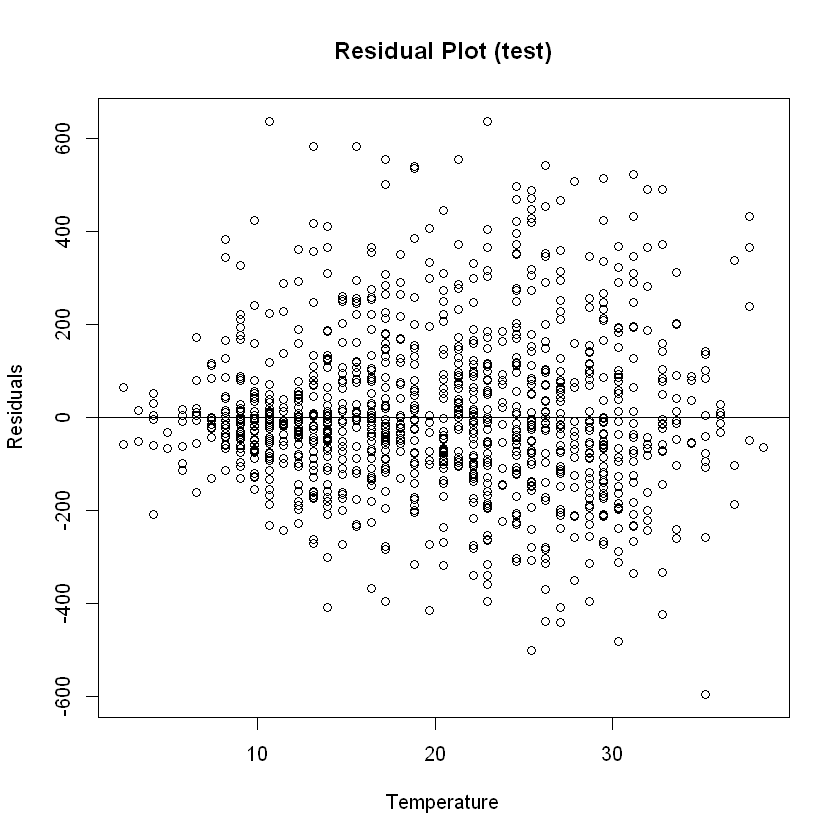

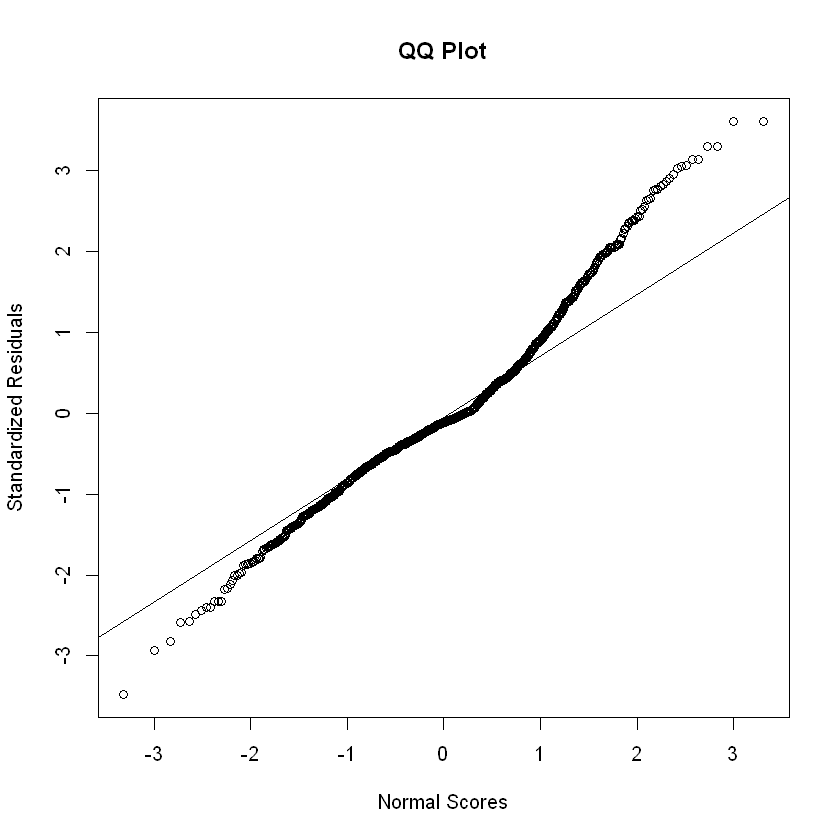

In [37]:
#----------------------------------
# K Nearest Neighbors - Regression
#----------------------------------
library(kknn)

#Train
model.KNN <- kknn(bike_rent_count~., train, test, k=3, distance = 2, scale=FALSE)
summary(model.KNN)

#Test
pred.KNN <- predict(model.KNN, newdata=test)
err.KNN <- test$bike_rent_count - pred.KNN 
rmse.KNN <- sqrt(mean((err.KNN^2)))

#Errors histogram
hist(err.KNN, main="bike_rent_count", sub="(Actual-Predicted)", xlab="Error", breaks=10, col="darkred")

#Residual plot
plot(test$temp, err.KNN, ylab="Residuals", xlab="Temperature", main="Residual Plot (test)") 
abline(0, 0)

#Q-Q plot
stdres.KNN = scale(err.KNN)
qqnorm(stdres.KNN, ylab="Standardized Residuals", xlab="Normal Scores", main="QQ Plot") 
qqline(stdres.KNN)


ERROR: Error in data.frame(test$bike_rent_count, pb$bike_rent_count): arguments imply differing number of rows: 1085, 0


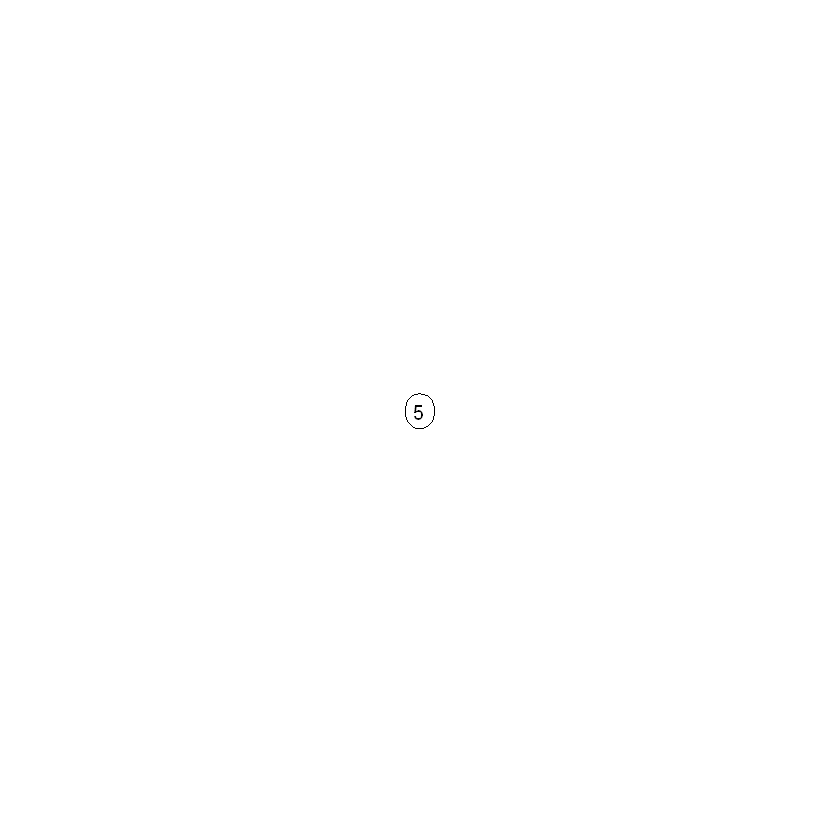

In [34]:
#---------------
# Decision tree
#---------------
library(caret)
library(rpart)
library(rpart.plot)	
library(AUC)

#train
model.Dtree <- rpart(bike_rent_count~., data = train, method="class")
prp(model.Dtree)

#lift chart
pb <- NULL
pb <- predict(model.Dtree, test)
pb <- as.data.frame(pb)
pred.Dtree <- data.frame(test$bike_rent_count, pb$Y)
colnames(pred.Dtree) <- c("target","score")
lift.Dtree <- lift(target ~ score, data = pred.Dtree, cuts=10, class="Y")
xyplot(lift.Dtree, main="Decision Tree - Lift Chart", type=c("l","g"), lwd=2
       , scales=list(x=list(alternating=FALSE,tick.number = 10)
                     ,y=list(alternating=FALSE,tick.number = 10)))

#confusion matrix
pc <- NULL
pc <- ifelse(pb$N > pb$Y, "N", "Y")
summary(as.data.frame(pc))
xtab <- table(pc, test$bike_rent_count)
caret::confusionMatrix(xtab, positive = "Y")

#roc chart
labels <- as.factor(ifelse(pred.Dtree$target=="Y", 1, 0))
predictions <- pred.Dtree$score
auc(roc(predictions, labels), min = 0, max = 1)
plot(roc(predictions, labels), min=0, max=1, type="l", main="Decision Tree - ROC Chart")


Call:
svm(formula = bike_rent_count ~ ., data = train)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.3333333 
    epsilon:  0.1 


Number of Support Vectors:  8517






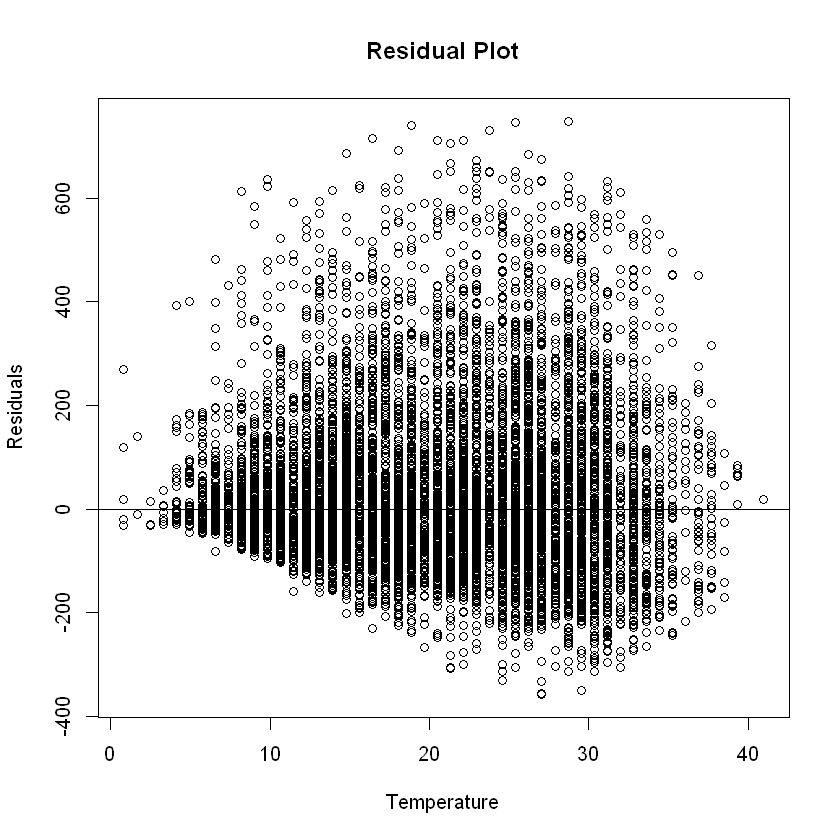

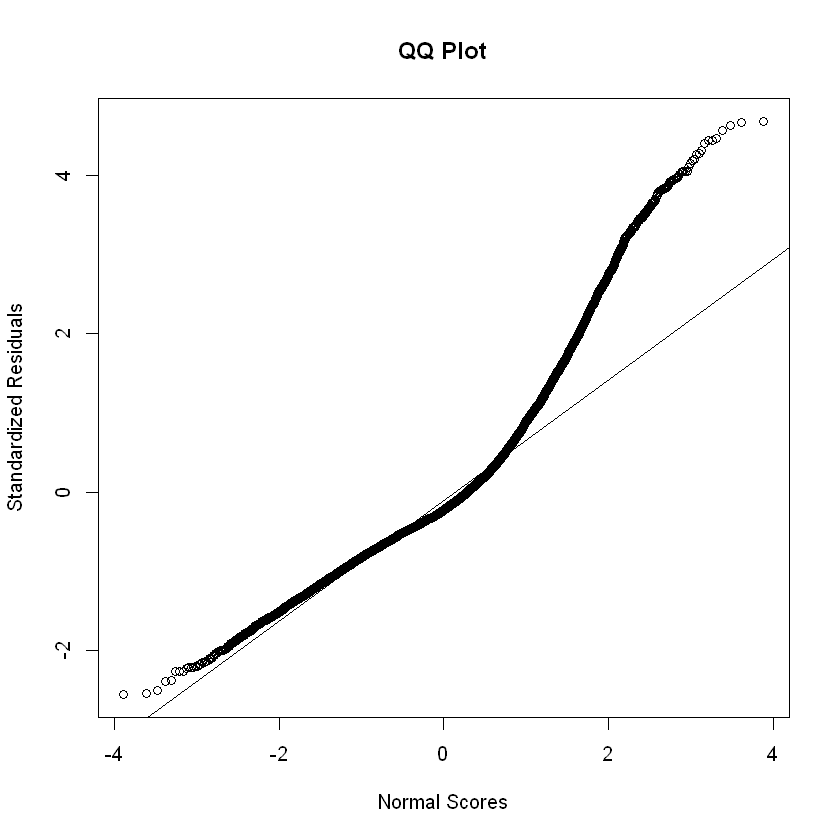

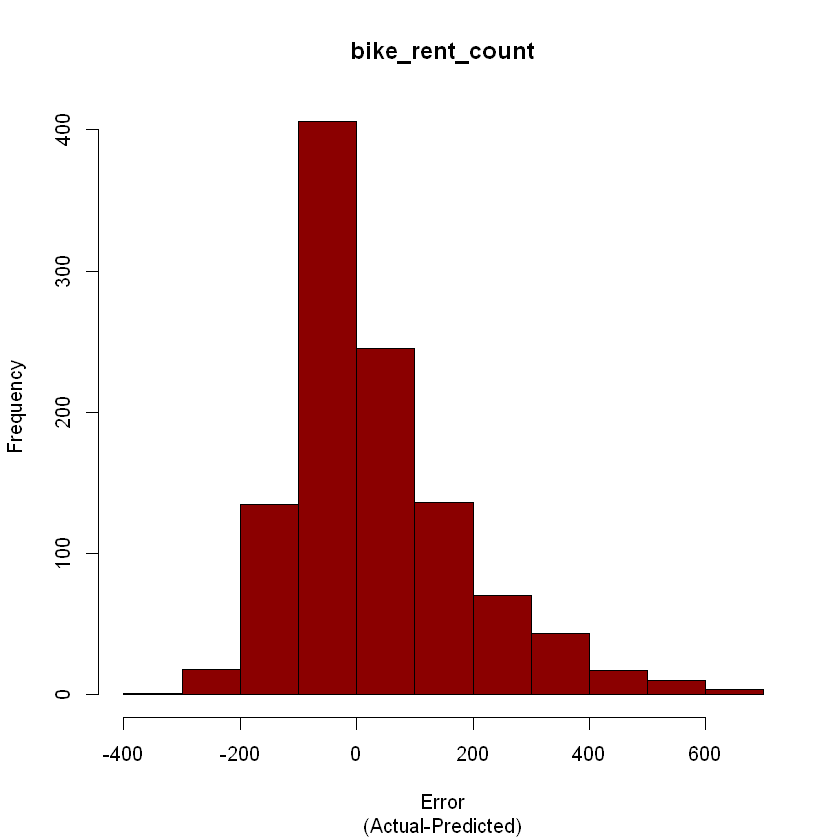

In [38]:
#--------------------------------------
# Support Vector Machines - Regression
#--------------------------------------
library(e1071)

#Train
model.SVR <- svm(bike_rent_count~., train)
summary(model.SVR)

#Residual plot
res.SVR = train$bike_rent_count-predict(model.SVR, newdata=train)
plot(train$temp, res.SVR, ylab="Residuals", xlab="Temperature", main="Residual Plot") 
abline(0, 0)

#Q-Q plot
stdres.SVR = scale(res.SVR)
qqnorm(stdres.SVR, ylab="Standardized Residuals", xlab="Normal Scores", main="QQ Plot") 
qqline(stdres.SVR)

#Test
pred.SVR <- predict(model.SVR, newdata=test)
err.SVR <- test$bike_rent_count - pred.SVR 
rmse.SVR <- sqrt(mean((err.SVR^2)))

#Errors histogram
hist(err.SVR, main="bike_rent_count", sub="(Actual-Predicted)", xlab="Error", breaks=10, col="darkred")